In [ ]:
import requests
import json
import pandas as pd
from datetime import datetime

In [34]:
# 📌 Headers con autenticación
headers = {
    "Accept": "application/json; application/vnd.esios-api-v1+json",
    "Content-Type": "application/json",
    "x-api-key": "273695bb4f30b8ab8de054a0410ee2a9d09c97a5006e3a07c27615e6c60888a7"
}


In [35]:
url= " https://api.esios.ree.es/indicators/1004"

In [36]:
# Realizar la solicitud GET
response = requests.get(url, headers=headers)


In [37]:
response.raise_for_status() #response.content

In [38]:
data= response.json()


In [39]:
# Guardar JSON en archivo solicitado
filename = "Demanda_tiempo_real_P.json"
with open(filename, "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

# Imprimir confirmación mínima
print(f"Guardado {filename} ({len(json.dumps(data))} bytes) - {datetime.utcnow().isoformat()}Z")

NameError: name 'json' is not defined

In [28]:
data_json =data['indicator']

In [29]:


# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response. json() # Convertir la respuesta en formato JSON
    print("Datos recibidos:", data) # Mostrar los datos recibidos
else:
    print(f"Error: {response.status_code}") # Mostrar el código de e

Datos recibidos: {'indicator': {'name': 'Término de facturación de energía activa del PVPC 2.0TD P2 llano ', 'short_name': 'PVPC T. 2.0TD P2', 'id': 1004, 'composited': False, 'step_type': 'linear', 'disaggregated': True, 'magnitud': [{'name': 'Precio €/MWh', 'id': 23}], 'tiempo': [{'name': 'Hora', 'id': 4}], 'geos': [{'geo_id': 8741, 'geo_name': 'Península'}, {'geo_id': 8742, 'geo_name': 'Canarias'}, {'geo_id': 8743, 'geo_name': 'Baleares'}, {'geo_id': 8744, 'geo_name': 'Ceuta'}, {'geo_id': 8745, 'geo_name': 'Melilla'}], 'values_updated_at': '2025-09-22T20:46:08.000+02:00', 'values': [{'value': 163.13, 'datetime': '2025-09-23T08:00:00.000+02:00', 'datetime_utc': '2025-09-23T06:00:00Z', 'tz_time': '2025-09-23T06:00:00.000Z', 'geo_id': 8741, 'geo_name': 'Península'}, {'value': 163.13, 'datetime': '2025-09-23T08:00:00.000+02:00', 'datetime_utc': '2025-09-23T06:00:00Z', 'tz_time': '2025-09-23T06:00:00.000Z', 'geo_id': 8742, 'geo_name': 'Canarias'}, {'value': 163.13, 'datetime': '2025-09-2

In [30]:
data['indicator']

{'name': 'Término de facturación de energía activa del PVPC 2.0TD P2 llano ',
 'short_name': 'PVPC T. 2.0TD P2',
 'id': 1004,
 'composited': False,
 'step_type': 'linear',
 'disaggregated': True,
 'magnitud': [{'name': 'Precio €/MWh', 'id': 23}],
 'tiempo': [{'name': 'Hora', 'id': 4}],
 'geos': [{'geo_id': 8741, 'geo_name': 'Península'},
  {'geo_id': 8742, 'geo_name': 'Canarias'},
  {'geo_id': 8743, 'geo_name': 'Baleares'},
  {'geo_id': 8744, 'geo_name': 'Ceuta'},
  {'geo_id': 8745, 'geo_name': 'Melilla'}],
 'values_updated_at': '2025-09-22T20:46:08.000+02:00',
 'values': [{'value': 163.13,
   'datetime': '2025-09-23T08:00:00.000+02:00',
   'datetime_utc': '2025-09-23T06:00:00Z',
   'tz_time': '2025-09-23T06:00:00.000Z',
   'geo_id': 8741,
   'geo_name': 'Península'},
  {'value': 163.13,
   'datetime': '2025-09-23T08:00:00.000+02:00',
   'datetime_utc': '2025-09-23T06:00:00Z',
   'tz_time': '2025-09-23T06:00:00.000Z',
   'geo_id': 8742,
   'geo_name': 'Canarias'},
  {'value': 163.13,
 

In [31]:
df = pd.DataFrame(data_json)

ValueError: All arrays must be of the same length

In [38]:
df.head()

,value,datetime,datetime_utc,tz_time,geo_id,geo_name
0,130.48,2025-09-18T00:00:00.000+02:00,2025-09-17T22:00:00Z,2025-09-17T22:00:00.000Z,1,Portugal
1,130.48,2025-09-18T00:00:00.000+02:00,2025-09-17T22:00:00Z,2025-09-17T22:00:00.000Z,3,España
2,127.81,2025-09-18T01:00:00.000+02:00,2025-09-17T23:00:00Z,2025-09-17T23:00:00.000Z,1,Portugal
3,127.81,2025-09-18T01:00:00.000+02:00,2025-09-17T23:00:00Z,2025-09-17T23:00:00.000Z,3,España
4,120.00,2025-09-18T02:00:00.000+02:00,2025-09-18T00:00:00Z,2025-09-18T00:00:00.000Z,1,Portugal


geo_name
España      Axes(0.125,0.11;0.775x0.77)
Portugal    Axes(0.125,0.11;0.775x0.77)
Name: value, dtype: object

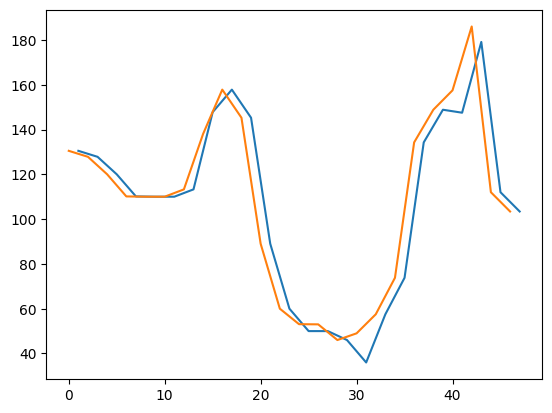

In [39]:
df.groupby('geo_name')['value'].plot()


In [40]:
pip install python-esios


Note: you may need to restart the kernel to use updated packages.


In [23]:
from esios import ESIOSClient

client = ESIOSClient(api_key_esios='273695bb4f30b8ab8de054a0410ee2a9d09c97a5006e3a07c27615e6c60888a7')
endpoint = client.endpoint (name='indicators')

In [24]:
df_indicator = endpoint.list()
df_indicator

,name,description,short_name,id
0,Generación programada PBF Hidráulica UGH,"Es el programa de energía diario, con desglose...",Hidráulica UGH,1
1,Generación programada PBF Hidráulica no UGH,"Es el programa de energía diario, con desglose...",Hidráulica no UGH,2
2,Generación programada PBF Turbinación bombeo,"Es el programa de energía diario, con desglose...",Turbinación bombeo,3
3,Generación programada PBF Nuclear,"Es el programa de energía diario, con desglose...",Nuclear,4
4,Generación programada PBF Hulla antracita Anex...,"Es el programa de energía diario, con desglose...",Hulla antracita RD 134/2010,5
...,...,...,...,...
1962,Porcentaje de Energía Renovable No Integrable ...,El proceso de solución de restricciones técnic...,% ERNI TOTAL,10462
1963,Precio medio ponderado reserva de regulación s...,La regulación secundaria es un servicio comple...,Banda de regulación secundaria a bajar,10463
1964,Almacenamiento total programa p48,,Total Almacenamiento,10464
1965,Necesidad total solicitada de energías de bala...,La regulación terciaria se corresponde con el ...,Necesidad total solicitada mFRR programada,10485


In [41]:
indicador = endpoint.select(id=84)

In [42]:
df_price = indicador.historical(start='2023-01-01', end='2023-01-31')
df_price

,84,geo_id,geo_name
datetime,,,
2023-01-01 00:00:00+01:00,0.050,8741,Península
2023-01-01 00:15:00+01:00,0.050,8741,Península
2023-01-01 00:30:00+01:00,0.050,8741,Península
2023-01-01 00:45:00+01:00,0.050,8741,Península
2023-01-01 01:00:00+01:00,0.050,8741,Península
...,...,...,...
2023-01-31 22:45:00+01:00,3.675,8741,Península
2023-01-31 23:00:00+01:00,2.350,8741,Península
2023-01-31 23:15:00+01:00,2.350,8741,Península


In [43]:
df_price.columns

Index(['84', 'geo_id', 'geo_name'], dtype='object')